## Exploratory Data analysis

### Import libraries and load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load dataset
df = pd.read_csv('../dataset/cleaned_data.csv')
df.head()

,Date,Measure,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Refresh Date,Year,Month,Weekday
0,2023-06-01,Business Crime Outcomes,Barking and Dagenham,POSSESSION OF WEAPONS,POSSESSION OF WEAPONS,Investigation Complete; No Suspect Identified....,N,1,2025-06-05,2023,6,Thursday
1,2023-06-01,Business Crime Outcomes,Barking and Dagenham,THEFT,OTHER THEFT,Investigation Complete; No Suspect Identified....,N,2,2025-06-05,2023,6,Thursday
2,2023-06-01,Business Crime Outcomes,Barking and Dagenham,THEFT,SHOPLIFTING,Named Suspect Identified: Victim Supports Poli...,N,2,2025-06-05,2023,6,Thursday
3,2023-06-01,Business Crime Outcomes,Barking and Dagenham,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Named Suspect Identified: Evidential Difficult...,N,2,2025-06-05,2023,6,Thursday
4,2023-06-01,Business Crime Outcomes,Barnet,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Named Suspect Identified: Victim Supports Poli...,N,1,2025-06-05,2023,6,Thursday


### Check data structure

In [3]:
# check for data types
df.dtypes

Date                object
Measure             object
Borough             object
Crime Section       object
Crime group         object
Outcome             object
Positive Outcome    object
Outcome Count        int64
Refresh Date        object
Year                 int64
Month                int64
Weekday             object
dtype: object

I will convert Date and Refresh date into datetime structure

In [4]:
# convert into date format
df['Date'] = pd.to_datetime(df['Date'])
df['Refresh Date'] = pd.to_datetime(df['Refresh Date'])
df.dtypes

Date                datetime64[ns]
Measure                     object
Borough                     object
Crime Section               object
Crime group                 object
Outcome                     object
Positive Outcome            object
Outcome Count                int64
Refresh Date        datetime64[ns]
Year                         int64
Month                        int64
Weekday                     object
dtype: object

In [5]:
# Overview of data
df.describe(include=['object','int64'])

,Measure,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Year,Month,Weekday
count,395120,395120,395120,395120,395120,395120,395120.000000,395120.000000,395120.000000,395120
unique,1,32,13,31,31,2,NaN,NaN,NaN,7
top,Business Crime Outcomes,Westminster,THEFT,VIOLENCE WITHOUT INJURY,Investigation Complete; No Suspect Identified....,N,NaN,NaN,NaN,Wednesday
freq,395120,22041,112790,54621,186169,346447,NaN,NaN,NaN,62311
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.150878,2023.936465,6.673484,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.372016,0.696979,3.495496,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023.000000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2024.000000,7.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2024.000000,10.000000,NaN


In [6]:
# check the proportion in each column
for col in df.select_dtypes(include='object').columns:
    print(f"\n Normalised value counts for: '{col}'")
    normalised_counts = df[col].value_counts(normalize=True)*100
    for category, percentage in normalised_counts.items():
         print(f"  {category}: {percentage:.2f}%")
    


 Normalised value counts for: 'Measure'
  Business Crime Outcomes: 100.00%

 Normalised value counts for: 'Borough'
  Westminster: 5.58%
  Camden: 4.15%
  Tower Hamlets: 4.04%
  Newham: 3.95%
  Lambeth: 3.92%
  Southwark: 3.91%
  Hackney: 3.72%
  Brent: 3.63%
  Islington: 3.61%
  Hillingdon: 3.49%
  Croydon: 3.46%
  Ealing: 3.41%
  Barnet: 3.28%
  Wandsworth: 3.27%
  Greenwich: 3.26%
  Lewisham: 3.23%
  Haringey: 3.15%
  Hounslow: 3.14%
  Enfield: 3.04%
  Hammersmith and Fulham: 2.98%
  Redbridge: 2.90%
  Bromley: 2.87%
  Kensington and Chelsea: 2.69%
  Waltham Forest: 2.69%
  Havering: 2.63%
  Barking and Dagenham: 2.52%
  Harrow: 2.07%
  Kingston upon Thames: 2.02%
  Merton: 1.99%
  Bexley: 1.98%
  Sutton: 1.72%
  Richmond upon Thames: 1.68%

 Normalised value counts for: 'Crime Section'
  THEFT: 28.55%
  VIOLENCE AGAINST THE PERSON: 22.75%
  PUBLIC ORDER OFFENCES: 10.17%
  VEHICLE OFFENCES: 7.94%
  ARSON AND CRIMINAL DAMAGE: 7.64%
  BURGLARY: 7.27%
  ROBBERY: 5.91%
  DRUG OFFENCES:

### Visualise distributions

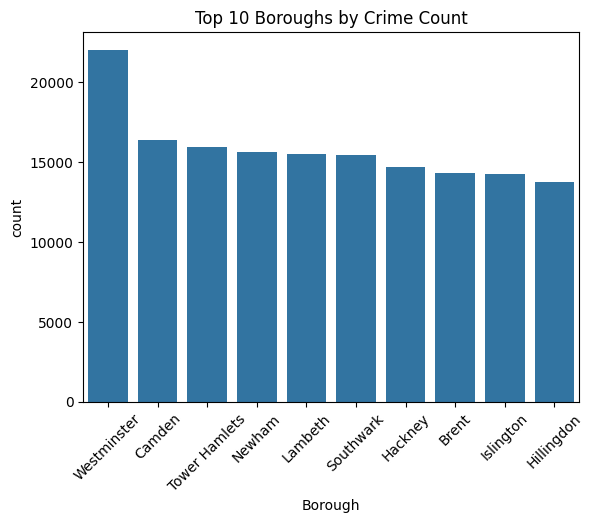

In [7]:
# create bar chart for top 10 crime count Boroughs
top_boroughs = df['Borough'].value_counts().nlargest(10).index

sns.countplot(data=df[df['Borough'].isin(top_boroughs)], x='Borough', 
              order=top_boroughs)
plt.xticks(rotation=45)
plt.title('Top 10 Boroughs by Crime Count')
plt.show()

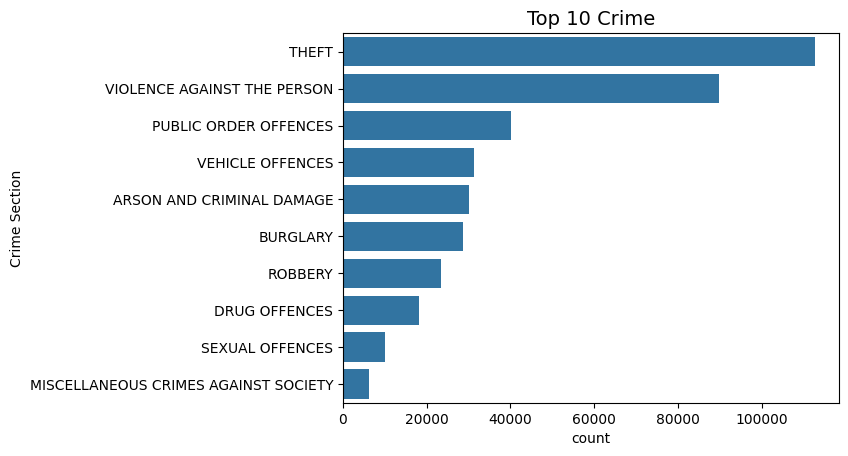

In [8]:
# create bar chart for top 10 Crime Section
top_crime_section = df['Crime Section'].value_counts().nlargest(10).index

cs = sns.countplot(data=df[df['Crime Section'].isin(top_crime_section)],  y='Crime Section', 
              order=top_crime_section)

cs.set_title('Top 10 Crime', fontsize=14, loc = 'center')
plt.show()

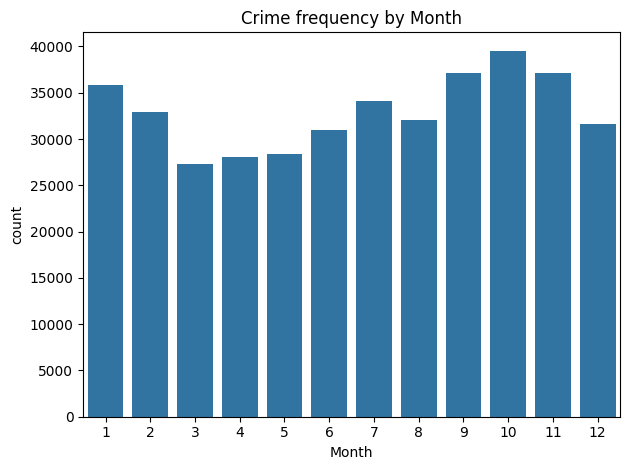

In [9]:
# create graph for crime frequency by month

sns.countplot(data=df, x='Month')
plt.title('Crime frequency by Month')
plt.tight_layout()
plt.show()

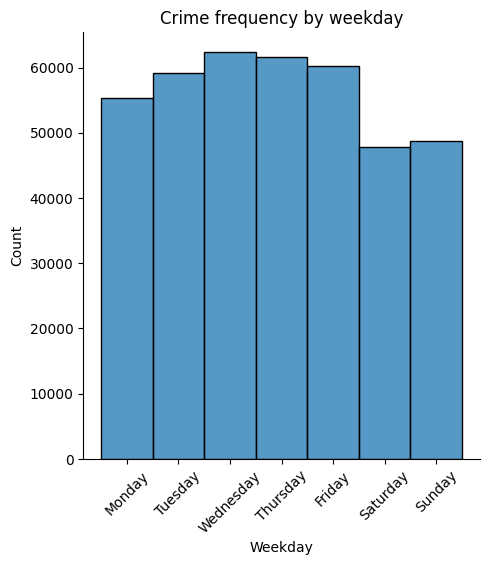

In [10]:
#sort Weekday in order
df['Weekday'] = pd.Categorical(df['Weekday'],
                               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                               ordered=True)
# histgram for weekday
sns.displot(data=df, x="Weekday")
plt.title('Crime frequency by weekday')
plt.xticks(rotation=45)
plt.show()

### Create contingency table from Crime Group and Positive Outcome

Comparing two categorical value. To assess which crime group have more positive outcome. Positive Outcome = Y means resolved crime through a formal or informal action taken.

In [11]:
# create cross-tab 
ct = pd.crosstab(df['Crime group'],df['Positive Outcome'])
ct_sorted = ct.sort_values(by='Y', ascending=False)
print(ct_sorted)

Positive Outcome                           N      Y
Crime group                                        
POSSESSION OF DRUGS                     2566  10157
SHOPLIFTING                            39416   8603
VIOLENCE WITHOUT INJURY                48664   5957
VIOLENCE WITH INJURY                   30504   4722
CRIMINAL DAMAGE                        25222   2871
BURGLARY BUSINESS AND COMMUNITY        17154   2600
POSSESSION OF WEAPONS                   1740   2071
MISC CRIMES AGAINST SOCIETY             4873   1269
RACE OR RELIGIOUS AGG PUBLIC FEAR       9183   1251
PUBLIC FEAR ALARM OR DISTRESS          23377   1229
OTHER OFFENCES PUBLIC ORDER             3859   1201
OTHER THEFT                            32111   1143
ROBBERY OF BUSINESS PROPERTY            8469   1021
OTHER SEXUAL OFFENCES                   6620    968
ROBBERY OF PERSONAL PROPERTY           12924    933
TRAFFICKING OF DRUGS                    4935    625
THEFT FROM THE PERSON                  21391    591
RAPE        

### Heatmap for Top 10 crime section vs Borough

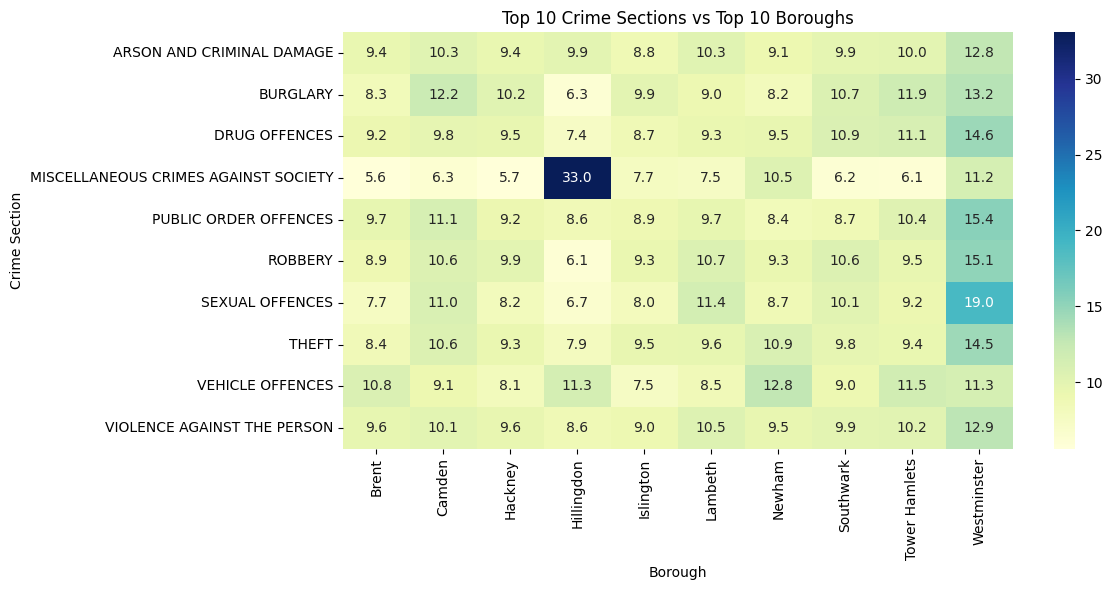

In [12]:
# filter the dataset. top_crime_section & top_boroughs shows top 10 results of those columns that were created in the first two visualisation graphs.
filtered_df = df[df['Crime Section'].isin(top_crime_section) & df['Borough'].isin(top_boroughs)]

# heatmap Crime section vs Borough

heat_data = pd.crosstab(filtered_df['Crime Section'], filtered_df['Borough'], normalize='index') * 100
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Top 10 Crime Sections vs Top 10 Boroughs')
plt.ylabel('Crime Section')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()

Each row is normalised so each Crime Section add up 100%. This shows which crime is more common in different borough.

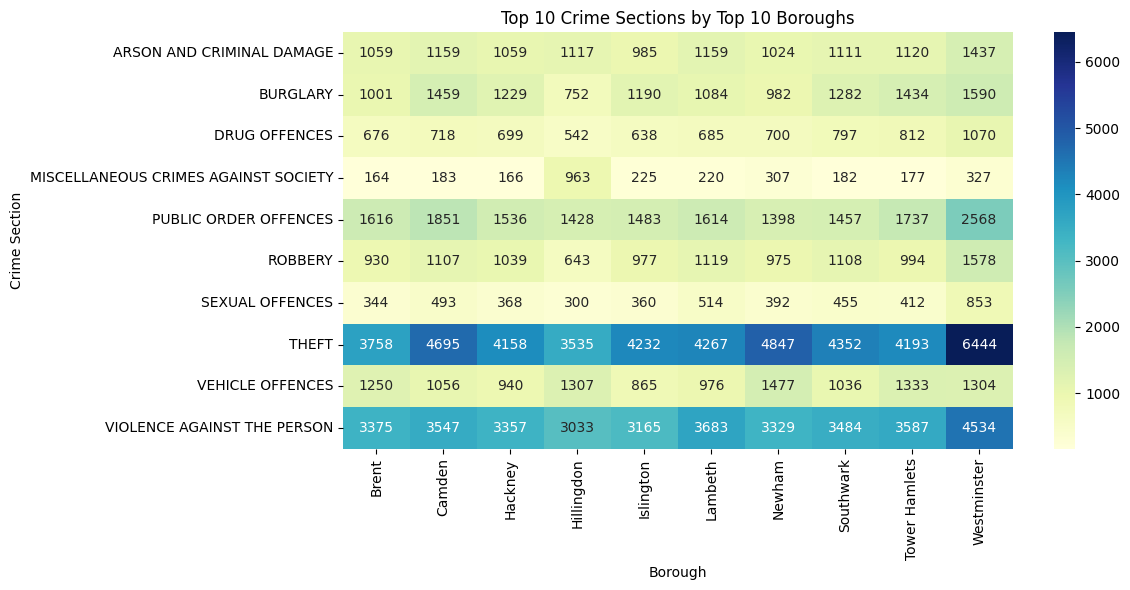

In [13]:
heat_data = pd.crosstab(filtered_df['Crime Section'], filtered_df['Borough'])
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Crime Sections by Top 10 Boroughs')
plt.ylabel('Crime Section')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()

This shows the count of each Crime Section in different Borough.

In [16]:
fig = px.line(df, x='Date', y='Borough', title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True) 
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed